In [1]:
# NB: alfanous is not compatible with Python 3, so need to use python 2 here.
%matplotlib inline
import os
import pandas as pd
import alfanous
import codecs
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
quotes_file = '/media/sf_VBox_Shared/Arabic/Analyses/Fiqh_final2/quotes/quran_quotes.csv'
metadata_file = '/media/sf_VBox_Shared/Arabic/fiqh_corpus/Meta/Metadata_Fiqh.csv'
out_dir = '/media/sf_VBox_Shared/Arabic/Analyses/Fiqh_final2/quotes/'

In [3]:
# Read in the meta data of the books
metadata = pd.read_csv(metadata_file, encoding='utf-8', sep=',', index_col=0)

In [4]:
metadata.shape

(55, 21)

In [5]:
metadata.head()

,BookURI,BookSource,BookTITLE_SHORT,BookTITLE,BookSUBJ,Number_of_tokens,AuthorAKA,AuthorNAME,AuthorBORNH,AuthorBORNC,...,AuthorDIEDC,Century,All_tokens_per-century,Author_Geographical_Area,BookVOLS,header_1,header_2,header_3,quran,hadith
Order,,,,,,,,,,,,,,,,,,,,,
1.0,0189AlShaybani.alAsl,http://shamela.ws/index.php/book/6164,الأصل,الأصل,حنفي,319286.0,الشيباني,أبو عبد الله محمد بن الحسن بن فرقد الشيباني,131,748,...,804,2ndH/8thC and 3rdH/9thC century,NaN,Fertile Crescent,5,0,241,0,43,0
2.0,0204Shafici.Umm,http://shamela.ws/index.php/book/1655,الأم,الأم,شافعي,1205588.0,الشافعي,أبو عبد الله محمد بن إدريس الشافعيّ المطَّلِبي...,150,767,...,820,2ndH/8thC and 3rdH/9thC century,NaN,Fertile Crescent,8,55,738,1136,2013,2209
3.0,0179MalikIbnAnas.Muwatta,http://shamela.ws/index.php/book/28107,الموطأ,الموطّأ,مالكي,151424.0,مالك بن أنس,مالك بن أنس بن مالك بن عامر الأصبحي المدني,93,711,...,795,2ndH/8thC and 3rdH/9thC century,NaN,Fertile Crescent,1,60,609,0,59,0
4.0,0311AbuBakrKhallal.WuqufWaTarajjul,http://shamela.ws/index.php/book/26883,الوقوف والترجل,الوقوف والترجل من الجامع لمسائل الإمام أحمد بن...,حنبلي,32349.0,الخلال,أبو بكر أحمد بن محمد بن هارون بن يزيد الخلال ا...,234,848,...,923,2ndH/8thC and 3rdH/9thC century,NaN,Fertile Crescent,1,0,84,0,8,51
5.0,0274AhmadBarqi.Mahasin,http://siratali.org/maktaba/mahasin1/,المحاسن,المحاسن,شيعي,145940.0,البرقي,أحمد بن محمد بن خالد البرقي,NODATA,NODATA,...,887,2ndH/8thC and 3rdH/9thC century,1854587.0,Fertile Crescent,2,0,403,0,0,0


In [6]:
# Read in the quran citations (files with one quote per line)
df = pd.read_csv(quotes_file, encoding='utf-8')
df['quote'] = df['quote'].astype('unicode')

In [7]:
df.shape

(17481, 3)

In [8]:
# How many files do we have?
df['BookURI'].nunique()

42

In [9]:
df.quote.dtype

dtype('O')

In [10]:
# How many tokens are the quotes?
nr_tokens = pd.Series([len(q.split(' ')) for q in df['quote']])

In [11]:
import numpy as np
from matplotlib.ticker import LinearLocator

def plot_int_hist(s, ax=None, maxVal=None):
    if maxVal is None:
        maxVal = max(s)+1
    if ax is None:
        ax = plt.gca()
        s.hist(bins=np.arange(min(s)-0.5, maxVal), grid=False, ax=ax)

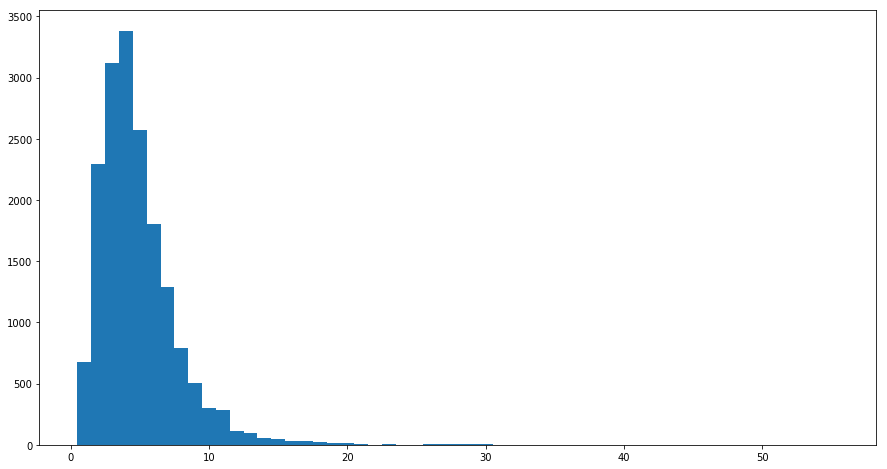

In [12]:
plt.figure(figsize=(15,8))
plot_int_hist(nr_tokens)
plt.show()

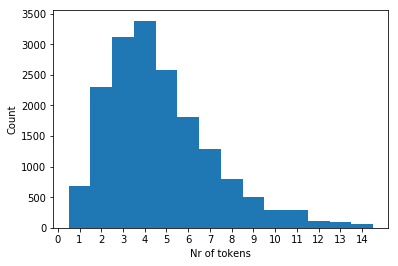

In [13]:
# Zoom in
maxnr = 15
plot_int_hist(nr_tokens, maxVal=maxnr)
plt.gca().set_xlabel('Nr of tokens')
plt.gca().set_ylabel('Count')
plt.gca().set_xticks(range(maxnr));

In [14]:
# Which quotes appear most often?
nr_quotes = df['quote'].value_counts()
nr_quotes.head(20)

وأشهدوا ذوي عدل منكم                  77
قل هو الله أحد                        67
وأولات الأحمال أجلهن أن يضعن حملهن    48
وأتموا الحج والعمرة لله               48
والذين يرمون أزواجهم                  47
وأحل الله البيع                       46
والجروح قصاص                          45
قل يا أيها الكافرون                   44
الطلاق مرتان                          43
فطلقوهن لعدتهن                        42
سبح اسم ربك الأعلى                    41
فرهان مقبوضة                          41
وعلى الوارث مثل ذلك                   40
فتحرير رقبة                           38
فنصف ما فرضتم                         38
فإن أرضعن لكم فآتوهن أجورهن           38
وأحل لكم ما وراء ذلكم                 37
وليطوفوا بالبيت العتيق                37
وحمله وفصاله ثلاثون شهرا              37
والسارق والسارقة فاقطعوا أيديهما      37
Name: quote, dtype: int64

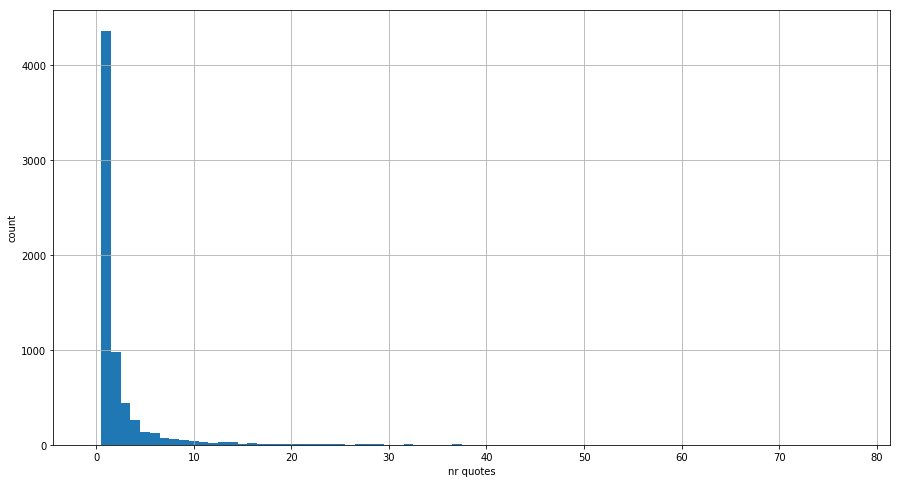

In [15]:
# Make a histogram of the counts per quote
plt.figure(figsize=(15,8))
nr_quotes.hist(bins=np.arange(-0.5, max(nr_quotes)+1))
plt.gca().set_xlabel('nr quotes')
plt.gca().set_ylabel('count')
plt.show()

In [16]:
# Use alfanous to trace the quotes back to quran verses
searches = {}
for q in df['quote'].unique():
    searches[q] = alfanous.search('"'+q+'"', view='minimal')

In [17]:
searches_fuzzy = {}
for q in df['quote'].unique():
    searches_fuzzy[q] = alfanous.search('"'+q+'"', view='minimal', fuzzy=True)

In [18]:
searches_words = {}
for q in df['quote'].unique():
    searches_words[q] = alfanous.search(q, view='minimal')

In [19]:
q_df = pd.DataFrame(nr_quotes)
q_df.head()

,quote
وأشهدوا ذوي عدل منكم,77
قل هو الله أحد,67
وأولات الأحمال أجلهن أن يضعن حملهن,48
وأتموا الحج والعمرة لله,48
والذين يرمون أزواجهم,47


In [20]:
# To do: Encoding issues
q_df['nr_ayas'] = [len(searches[unicode(q)]['search']['ayas']) for q in q_df.index]
q_df['nr_ayas_fuzzy'] = [len(searches_fuzzy[unicode(q)]['search']['ayas']) for q in q_df.index]
q_df['nr_ayas_words'] = [len(searches_words[unicode(q)]['search']['ayas']) for q in q_df.index]

In [21]:
q_df['nr_tokens'] = q_df.index.map(lambda s: len(s.split(' ')))

In [22]:
q_df.head()

,quote,nr_ayas,nr_ayas_fuzzy,nr_ayas_words,nr_tokens
وأشهدوا ذوي عدل منكم,77,1,1,10,4
قل هو الله أحد,67,1,1,10,4
وأولات الأحمال أجلهن أن يضعن حملهن,48,1,1,10,6
وأتموا الحج والعمرة لله,48,1,1,10,4
والذين يرمون أزواجهم,47,1,1,10,3


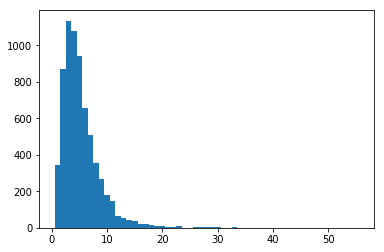

In [23]:
plot_int_hist(q_df['nr_tokens'])

In [24]:
# How many quotes have fewer than x tokens?
sum(q_df['nr_tokens']<3) / float(len(q_df))

0.17837202468410226

In [25]:
# How many quotes are more often found with 'fuzzy'?
len(q_df[q_df['nr_ayas_fuzzy']>q_df['nr_ayas']])

157

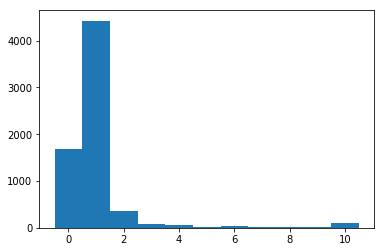

In [26]:
# How many aya's are found for each quote, non-fuzzy??
plot_int_hist(q_df['nr_ayas'])

In [27]:
# How many quotes have no aya?
sum(q_df['nr_ayas']==0) / float(len(q_df))

0.24786952688803995

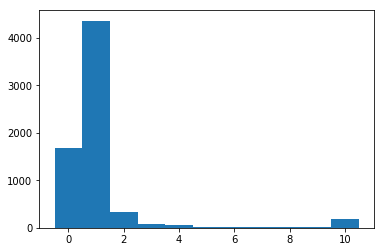

In [28]:
# How many aya's are found for each quote??
plot_int_hist(q_df['nr_ayas_fuzzy'])

0.256576911173


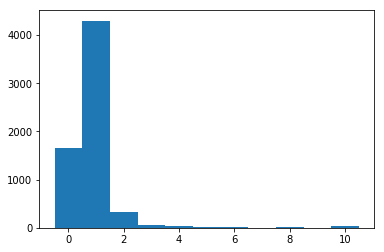

In [29]:
# How many aya's are found for each quote with more than 1 token
print(sum(q_df[q_df.nr_tokens>1]['nr_ayas_fuzzy']==0) / float(len(q_df[q_df.nr_tokens>1])))
plot_int_hist(q_df[q_df.nr_tokens>1]['nr_ayas_fuzzy'])

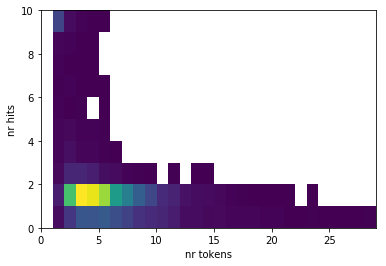

In [30]:
plt.hist2d(q_df.nr_tokens, q_df.nr_ayas_fuzzy, cmin=1, bins=(range(30), range(11)))
plt.xlabel('nr tokens')
plt.ylabel('nr hits')
plt.show()

In [31]:
# How many quotes have no aya (fuzzy)?
sum(q_df['nr_ayas_fuzzy']==0) / float(len(q_df))

0.2475756685277696

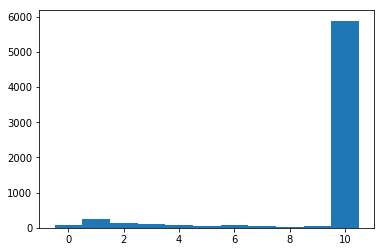

In [32]:
# How many ayas do we find using separate word search?
plot_int_hist(q_df['nr_ayas_words'])

In [33]:
# How many quotes have no aya with word search?
sum(q_df['nr_ayas_words']==0) / float(len(q_df))

0.012195121951219513

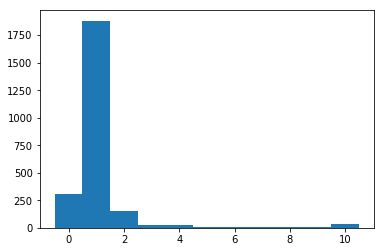

In [34]:
# How many aya's are found for quotes appearing more than once?
plot_int_hist(q_df[q_df['quote']>1]['nr_ayas'])

In [35]:
q_df['nr_books'] = df.groupby('quote').nunique()['BookURI']

In [37]:
# Some examples of quotes with no aya
q_df[q_df['nr_ayas']<1].head(20)

,quote,nr_ayas,nr_ayas_fuzzy,nr_ayas_words,nr_tokens,nr_books
تنبيه,27,0,0,0,1,1
ولمن جاء به حمل بعير وأنا زعيم,17,0,0,10,7,13
والمحصنات من الذين أوتوا الكتاب قبلكم,14,0,0,10,6,11
الم تنزيل,14,0,0,10,2,7
ففدية من صيام أو صدقة نسك,13,0,0,10,6,8
أسكنوهن من حيث سكنتم وجدكم,12,0,0,10,5,7
ولا يضار كاتب شهيد,12,0,0,10,4,7
nan,12,0,0,0,1,5
ولا تحلقوا رؤوسكم حتى يبلغ الهدي محله,12,0,0,10,7,4
ما جعل الله من بحيرة ولا سائبة وصيلة حام,10,0,0,10,9,2


In [38]:
example_search = searches_words[q_df[q_df['nr_ayas']<1].index[1]]
example_search['search'].keys()

['translation_info', 'ayas', 'runtime', 'words', 'interval']

In [39]:
example_search['search']['words']

{'individual': {}}

In [40]:
example_search['search']['ayas'][1]

{'annotations': {},
 'aya': {'id': 72,
  'next_aya': None,
  'prev_aya': None,
  'recitation': None,
  'text': u'\u0642\u0627\u0644\u0648\u0627 \u0646\u0641\u0642\u062f \u0635\u0648\u0627\u0639 \u0627\u0644\u0645\u0644\u0643 <b>\u0648\u0644\u0645\u0646</b> <b>\u062c\u0627\u0621</b> <b>\u0628\u0647</b> <b>\u062d\u0645\u0644</b> <b>\u0628\u0639\u064a\u0631</b> <b>\u0648\u0623\u0646\u0627</b> <b>\u0628\u0647</b> <b>\u0632\u0639\u064a\u0645</b>',
  'text_no_highlight': u'\u0642\u0627\u0644\u0648\u0627 \u0646\u0641\u0642\u062f \u0635\u0648\u0627\u0639 \u0627\u0644\u0645\u0644\u0643 \u0648\u0644\u0645\u0646 \u062c\u0627\u0621 \u0628\u0647 \u062d\u0645\u0644 \u0628\u0639\u064a\u0631 \u0648\u0623\u0646\u0627 \u0628\u0647 \u0632\u0639\u064a\u0645',
  'translation': None},
 'identifier': {'aya_id': 72,
  'gid': 1668,
  'sura_arabic_name': u'\u064a\u0648\u0633\u0641',
  'sura_id': 12,
  'sura_name': u'Yusuf'},
 'position': {},
 'sajda': {},
 'stat': {},
 'sura': {},
 'theme': {}}

In [41]:
# How often is the first aya different for regular and fuzzy search?
ayas = {q: searches[q]['search']['ayas'].get(1, {}) for q in q_df.index}
ayas_fuzzy = {q: searches_fuzzy[q]['search']['ayas'].get(1, {}) for q in q_df.index}
is_same = [ayas[q].get(1)==ayas_fuzzy[q].get(1) for q in q_df.index if len(ayas[q])>0 and len(ayas_fuzzy[q])>0]
np.mean(is_same)

1.0

In [42]:
# How often is the first aya different for fuzzy search and word search?
ayas_words = {q: searches_words[q]['search']['ayas'].get(1, {}) for q in q_df.index}
ayas_fuzzy = {q: searches_fuzzy[q]['search']['ayas'].get(1, {}) for q in q_df.index}
is_same = [ayas_words[q].get(1)==ayas_fuzzy[q].get(1) for q in q_df.index if len(ayas_words[q])>0 and len(ayas_fuzzy[q])>0]
np.mean(is_same)

1.0

IFf multiple aya's are found with regular search, we take the first one (because they are sorted on relevance). if none are found, we can:
- disregard the quote eventually.
- take the first result of separate word search

In [43]:
metafields_aya = 'aya_id', 'sura_id', 'sura_name', 'sura_arabic_name'

ayas = {}
for q in q_df.index:
    s_result_fuzzy = searches_fuzzy[q]['search']['ayas']
    s_result_words = searches_words[q]['search']['ayas']
    if len(s_result_fuzzy)>0:
        ayas[q] = s_result_fuzzy[1]['identifier']
    elif len(s_result_words)>0:
        ayas[q] = s_result_words[1]['identifier']
    else:
        ayas[q] = {}

for m in metafields_aya:
    q_df[m] = [ayas[q].get(m, None) for q in q_df.index]

In [44]:
q_df['id'] = zip(q_df['sura_id'], q_df['aya_id'])

In [45]:
# Note that multiple quotes can come from the same aya
q_df.head()

,quote,nr_ayas,nr_ayas_fuzzy,nr_ayas_words,nr_tokens,nr_books,aya_id,sura_id,sura_name,sura_arabic_name,id
وأشهدوا ذوي عدل منكم,77,1,1,10,4,22,2.0,65.0,At-Talaq,الطلاق,"(65.0, 2.0)"
قل هو الله أحد,67,1,1,10,4,26,1.0,112.0,Al-Ikhlas,الإخلاص,"(112.0, 1.0)"
وأولات الأحمال أجلهن أن يضعن حملهن,48,1,1,10,6,18,4.0,65.0,At-Talaq,الطلاق,"(65.0, 4.0)"
وأتموا الحج والعمرة لله,48,1,1,10,4,20,196.0,2.0,Al-Baqarah,البقرة,"(2.0, 196.0)"
والذين يرمون أزواجهم,47,1,1,10,3,18,6.0,24.0,An-Nur,النور,"(24.0, 6.0)"


In [46]:
print(len(q_df[q_df.aya_id.isna()]))

81


In [47]:
q_df[q_df.aya_id.isna()].head()

,quote,nr_ayas,nr_ayas_fuzzy,nr_ayas_words,nr_tokens,nr_books,aya_id,sura_id,sura_name,sura_arabic_name,id
تنبيه,27,0,0,0,1,1,NaN,NaN,None,None,"(nan, nan)"
nan,12,0,0,0,1,5,NaN,NaN,None,None,"(nan, nan)"
أعتقها ولدها,6,0,0,0,2,1,NaN,NaN,None,None,"(nan, nan)"
الزعيم غارم,4,0,0,0,2,1,NaN,NaN,None,None,"(nan, nan)"
العمد قود,3,0,0,0,2,1,NaN,NaN,None,None,"(nan, nan)"


In [54]:
q_df_filtered = q_df[q_df.nr_tokens>2]
print(len(q_df_filtered[q_df_filtered.aya_id.isna()]))
print(1-len(q_df_filtered)/float(len(q_df)))

25
0.178372024684


In [50]:
# How many quotes have no aya with word search?
print(sum(q_df_filtered['nr_ayas_fuzzy']==0) / float(len(q_df_filtered)))
print(sum(q_df_filtered['nr_ayas_words']==0) / float(len(q_df_filtered)))

0.274141630901
0.00447067238913


In [61]:
quotes_original_merged = df.merge(q_df_filtered.dropna(), left_on='quote', right_index=True, suffixes=('', '_cnt'), how='left')
quotes_original_merged.head()

,BookURI,position,quote,quote_cnt,nr_ayas,nr_ayas_fuzzy,nr_ayas_words,nr_tokens,nr_books,aya_id,sura_id,sura_name,sura_arabic_name,id
0,0587IbnMascudCalaDinKasani.BadaicSanaic,302,فاغسلوا وجوهكم,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0587IbnMascudCalaDinKasani.BadaicSanaic,700,وأيديكم,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0587IbnMascudCalaDinKasani.BadaicSanaic,1817,برؤوسكم,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0587IbnMascudCalaDinKasani.BadaicSanaic,2016,يطوف عليهم ولدان مخلدون,1.0,1.0,1.0,10.0,4.0,1.0,17.0,56.0,Al-Waqi'a,الواقعة,"(56.0, 17.0)"
4,0587IbnMascudCalaDinKasani.BadaicSanaic,7835,وينزل عليكم من السماء ماء ليطهركم به,9.0,1.0,1.0,10.0,7.0,7.0,11.0,8.0,Al-Anfal,الأنفال,"(8.0, 11.0)"


In [62]:
# We merge the literal quotes with the information on the aya's
links_merged = quotes_original_merged.dropna(subset=['sura_id'])

In [56]:
quotes_original_merged = quotes_original_merged.drop(['id', 'quote_cnt', 'nr_ayas'], axis=1)
quotes_original_merged.to_csv(os.path.join(out_dir, 'quran_quotes_ayas_v2.csv'), index=False, encoding='utf-8')

In [63]:
links_merged.head()

,BookURI,position,quote,quote_cnt,nr_ayas,nr_ayas_fuzzy,nr_ayas_words,nr_tokens,nr_books,aya_id,sura_id,sura_name,sura_arabic_name,id
3,0587IbnMascudCalaDinKasani.BadaicSanaic,2016,يطوف عليهم ولدان مخلدون,1.0,1.0,1.0,10.0,4.0,1.0,17.0,56.0,Al-Waqi'a,الواقعة,"(56.0, 17.0)"
4,0587IbnMascudCalaDinKasani.BadaicSanaic,7835,وينزل عليكم من السماء ماء ليطهركم به,9.0,1.0,1.0,10.0,7.0,7.0,11.0,8.0,Al-Anfal,الأنفال,"(8.0, 11.0)"
5,0587IbnMascudCalaDinKasani.BadaicSanaic,8234,فلم تجدوا ماء فتيمموا صعيدا طيبا,19.0,2.0,2.0,10.0,6.0,13.0,43.0,4.0,An-Nisa',النساء,"(4.0, 43.0)"
6,0587IbnMascudCalaDinKasani.BadaicSanaic,8382,فلم تجدوا ماء فتيمموا صعيدا طيبا,19.0,2.0,2.0,10.0,6.0,13.0,43.0,4.0,An-Nisa',النساء,"(4.0, 43.0)"
7,0587IbnMascudCalaDinKasani.BadaicSanaic,10761,ولكن يريد ليطهركم,6.0,1.0,1.0,10.0,3.0,4.0,6.0,5.0,Al-Ma'idah,المائدة,"(5.0, 6.0)"


In [64]:
links_merged.shape

(14479, 14)

In [65]:
links = pd.DataFrame(links_merged.groupby(['BookURI', 'id']).count()['quote'])
links = links.reset_index()
links.columns = ['Source', 'Target', 'Weight']

In [66]:
links.shape

(7458, 3)

In [67]:
# Store the nodes and links
links.to_csv(os.path.join(out_dir, 'fiqh_quran_links_v2.csv'), index=False)

In [68]:
metadata.columns

Index([u'BookURI', u'BookSource', u'BookTITLE_SHORT', u'BookTITLE',
       u'BookSUBJ', u'Number_of_tokens', u'AuthorAKA', u'AuthorNAME',
       u'AuthorBORNH', u'AuthorBORNC', u'AuthorDIEDH', u'AuthorDIEDC',
       u'Century', u'All_tokens_per-century', u'Author_Geographical_Area',
       u'BookVOLS', u'header_1', u'header_2', u'header_3', u'quran',
       u'hadith'],
      dtype='object')

In [100]:
book_nodes = metadata[metadata.BookURI.isin(df.BookURI)].copy()
book_nodes['id'] = book_nodes['BookURI']
book_nodes['Type'] = 'book'
book_nodes['Label'] = book_nodes['BookTITLE_SHORT']
book_nodes['Group'] = book_nodes['BookSUBJ']
book_nodes.to_csv(os.path.join(out_dir, 'fiqh_quran_book_nodes.csv'), index=False, encoding='utf-8')

In [69]:
quran_nodes = q_df_filtered.dropna().reset_index()[['id', 'sura_id', 'aya_id', 'sura_name', 'sura_arabic_name']].drop_duplicates()
quran_nodes['aya_id'] = quran_nodes['aya_id'].astype('int')
quran_nodes['sura_id'] = quran_nodes['sura_id'].astype('int')
quran_nodes['Type'] = 'aya'
quran_nodes['Label'] = quran_nodes['sura_name'] + [' {:.0f}'.format(s) for s in quran_nodes['aya_id']]
quran_nodes['Group'] = 'aya'
quran_nodes.to_csv(os.path.join(out_dir, 'fiqh_quran_aya_nodes_v2.csv'), index=False, encoding='utf-8')

## Some more analysis

In [ ]:
# Look at quotes to the aya with different quotes
q_df[(q_df['sura_id']==2) & (q_df['aya_id']==282)]